In [48]:
import pandas as pd
adult=pd.read_csv("B:\\downloads\\adult-census-income\\adult.csv")

In [4]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### step to check the ? present in which columns

In [5]:
adult.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

In [6]:
def vc(x):
    print(x.value_counts())
adult['age'].isnull().value_counts()

False    32561
Name: age, dtype: int64

In [18]:
vc(adult["workclass"]),vc(adult["education"]),vc(adult["marital.status"]),vc(adult["occupation"])
## workclass contains ? value with count 1836 and in occupation

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

(None, None, None, None)

In [24]:
vc(adult["relationship"]),vc(adult["race"]),vc(adult["sex"]),vc(adult["native.country"]),vc(adult["income"])
#,vc(adult["education"]),vc(adult["marital.status"]),vc(adult["occupation"])
## native_country value with count 586 



Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Male      21790
Female    10771
Name: sex, dtype: int64
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                   

(None, None, None, None, None)

In [7]:
adult_d=adult.fillna('?')

In [8]:
adult_d.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
adult_d.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### replace the '?' into None 

In [49]:
#adult_d.replace('-', np.nan)
adult_d.replace({'?': None},inplace=True)

In [50]:
adult_d.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### to check the which null value is present in which colunms

In [51]:
adult_d.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
adult_d.columns[adult_d.isnull().any()].tolist()

['workclass', 'occupation', 'native.country']

In [14]:
adnu=adult_d[(adult_d['workclass'].isnull())& (adult_d['occupation'].isnull()) &(adult_d['native.country'].isnull())]

In [15]:
adn=adult_d[(adult_d['workclass'].isnull())& (adult_d['occupation'].isnull())]
adnu.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1181,68,None,286869,7th-8th,4,Widowed,None,Not-in-family,White,Female,0,1668,40,None,<=50K
1204,41,None,211873,Assoc-voc,11,Married-civ-spouse,None,Wife,White,Female,0,1628,5,None,<=50K
2591,38,None,94559,Bachelors,13,Married-civ-spouse,None,Wife,Other,Female,7688,0,50,None,>50K
3415,47,None,174525,HS-grad,9,Married-civ-spouse,None,Husband,White,Male,3942,0,40,None,<=50K
3508,39,None,157443,Masters,14,Married-civ-spouse,None,Wife,Asian-Pac-Islander,Female,3464,0,40,None,<=50K


In [16]:
print "the all null present ",len(adnu)

the all null present  27


In [17]:
print "the all null present in both columns commely ",len(adn)

the all null present in both columns commely  1836


In [18]:
print " the total number of rows present in in adult_dataset",len(adult_d)

 the total number of rows present in in adult_dataset 32561


##### remove the null value in data set

In [52]:
adult_data_nullvalue_drop = adult_d.dropna(how="any")


In [20]:
adult_data_nullvalue_drop.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [21]:
len(adult_data_nullvalue_drop)

30162

In [22]:
len(adult_d)

32561

In [23]:
32561-30162

2399

In [24]:
### now remove the row which has the both null value

In [64]:
adult_data=adult_d.dropna(subset=["workclass","occupation"])

In [65]:
adult_data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

####  if we see above only null vale present in workclass and occupation is been remove

In [40]:
len(adult_data)

30718

In [41]:
adult_data.dtypes

age                int64
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [42]:
adult_data["age"].value_counts()

36    875
31    869
34    860
33    849
37    849
35    844
30    832
23    830
28    826
38    810
25    809
39    804
32    803
27    802
41    790
29    785
40    777
42    765
24    764
26    763
43    757
46    726
45    723
44    714
47    694
22    686
20    637
21    631
19    599
50    588
     ... 
17    330
60    281
61    264
62    216
63    191
64    177
65    139
66    113
67    112
68     92
69     80
70     65
71     54
73     49
72     42
74     39
90     36
75     34
76     30
77     20
80     16
79     15
81     14
78     14
84      8
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64

In [54]:
adult_data["sex"].value_counts()

Male      20788
Female     9930
Name: sex, dtype: int64

In [99]:
adult_data["education"].value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [100]:
adult_data["income"].value_counts()

<=50K    23068
>50K      7650
Name: income, dtype: int64

## Boolean Indexing

#### now we are going create table by using boolean using 

In [109]:
adult_data.loc[(adult_data["sex"]=="Female")&(adult_data["age"]>40)& 
               (adult_data["education"]=="HS-grad")& (adult_data["income"]=='>50K'),
                                                      ["sex","age","education","income"]]


,sex,age,education,income
51,Female,50,HS-grad,>50K
122,Female,49,HS-grad,>50K
187,Female,48,HS-grad,>50K
189,Female,55,HS-grad,>50K
807,Female,55,HS-grad,>50K
971,Female,48,HS-grad,>50K
1577,Female,50,HS-grad,>50K
1581,Female,56,HS-grad,>50K
1605,Female,51,HS-grad,>50K
1646,Female,60,HS-grad,>50K


In [55]:
adult_data.loc[(adult_data["sex"]=="Male")&(adult_data["age"]>50)& 
               (adult_data["education"]=="Bachelors")& (adult_data["income"]=='<=50K'),
                                                      ["sex","age","education","income"]]

,sex,age,education,income
171,Male,57,Bachelors,<=50K
289,Male,59,Bachelors,<=50K
316,Male,56,Bachelors,<=50K
658,Male,51,Bachelors,<=50K
1039,Male,63,Bachelors,<=50K
1131,Male,51,Bachelors,<=50K
1330,Male,55,Bachelors,<=50K
1421,Male,57,Bachelors,<=50K
1468,Male,54,Bachelors,<=50K
2241,Male,90,Bachelors,<=50K


In [56]:
adult_m50=adult_data.loc[(adult_data["sex"]=="Male")&(adult_data["age"]>60)& 
               (adult_data["education"]=="Masters")& (adult_data["income"]=='>50K'),
                                                      ["sex","age","education","income"]]

In [58]:
adult_m50.head()
#len(adult_m50)

,sex,age,education,income
119,Male,68,Masters,>50K
132,Male,68,Masters,>50K
191,Male,70,Masters,>50K
1650,Male,71,Masters,>50K
1736,Male,65,Masters,>50K


##2 – Apply Function

##### It is one of the commonly used functions for playing with data and creating new variables. Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [139]:
def caps(x):
    return x.upper()

In [140]:
adult_m50["sex"].apply(caps)

119      MALE
132      MALE
191      MALE
1650     MALE
1736     MALE
1739     MALE
1741     MALE
1773     MALE
2228     MALE
2307     MALE
2810     MALE
2953     MALE
2956     MALE
2987     MALE
4320     MALE
4541     MALE
5278     MALE
6117     MALE
6240     MALE
6245     MALE
6852     MALE
8725     MALE
8914     MALE
8986     MALE
10595    MALE
11100    MALE
12813    MALE
12817    MALE
15197    MALE
16774    MALE
17879    MALE
21145    MALE
26663    MALE
27709    MALE
28307    MALE
29338    MALE
31079    MALE
32451    MALE
Name: sex, dtype: object

In [141]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print adult_d.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print adult_d.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Missing values per row:
0    2
1    0
2    2
3    0
4    0
dtype: int64


In [147]:
adult_m50["age"].apply(lambda x: x**2)



119      4624
132      4624
191      4900
1650     5041
1736     4225
1739     8100
1741     4489
1773     4489
2228     5041
2307     4900
2810     3721
2953     4225
2956     4761
2987     4225
4320     5776
4541     3844
5278     3721
6117     3969
6240     3844
6245     3969
6852     3721
8725     5776
8914     8100
8986     3844
10595    4489
11100    5329
12813    3721
12817    3969
15197    3969
16774    4096
17879    3844
21145    4489
26663    4489
27709    3969
28307    3721
29338    3721
31079    4489
32451    4356
Name: age, dtype: int64

In [148]:
def subt(x, custom_value):
       return x-custom_value

In [149]:
adult_m50["age"].apply(subt, args=(5,))

119      63
132      63
191      65
1650     66
1736     60
1739     85
1741     62
1773     62
2228     66
2307     65
2810     56
2953     60
2956     64
2987     60
4320     71
4541     57
5278     56
6117     58
6240     57
6245     58
6852     56
8725     71
8914     85
8986     57
10595    62
11100    68
12813    56
12817    58
15197    58
16774    59
17879    57
21145    62
26663    62
27709    58
28307    56
29338    56
31079    62
32451    61
Name: age, dtype: int64

###  Imputing missing files

In [150]:
titanic=pd.read_csv("B:/data science courses/Titanic project/train.csv")

In [151]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
titanic.columns[titanic.isnull().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [154]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### so age is integer value we can fill with mean or medium or mode

In [167]:
titanic['Age'].fillna((titanic['Age'].mean), inplace=True)

In [168]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### if look at above data means its clear that the age nan value fill with mean

In [169]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [171]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [173]:
titanic['Embarked'].fillna(("S"),inplace=True)

In [174]:
titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [176]:
titanic.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

### Pivot Table

#### Pandas can be used to create MS Excel style pivot tables.

In [28]:
#Determine pivot table
impute_grps = adult_data.pivot_table(values=["capital.gain"], 
                          index=["sex","income","occupation"])
print impute_grps

                                 capital.gain
sex    income occupation                     
Female <=50K  Adm-clerical         124.224516
              Craft-repair          47.074257
              Exec-managerial      107.530148
              Farming-fishing      458.555556
              Handlers-cleaners    139.118750
              Machine-op-inspct     94.726415
              Other-service         86.176672
              Priv-house-serv      113.342857
              Prof-specialty       188.225664
              Protective-serv      102.939394
              Sales                 70.153191
              Tech-support         251.102310
              Transport-moving     112.444444
       >50K   Adm-clerical        4678.103774
              Craft-repair        7925.600000
              Exec-managerial     3857.700000
              Farming-fishing    19174.000000
              Handlers-cleaners      0.000000
              Machine-op-inspct   2226.300000
              Other-service       

In [30]:
#Determine pivot table
imputegrps = adult_data.pivot_table(values=["capital.gain"], 
                          index=["sex","income","workclass"])
print imputegrps

                                capital.gain
sex    income workclass                     
Female <=50K  Federal-gov         173.123552
              Local-gov           165.333333
              Private             108.390692
              Self-emp-inc         68.914894
              Self-emp-not-inc    191.517350
              State-gov           146.631829
              Without-pay           0.000000
       >50K   Federal-gov        3512.196429
              Local-gov          4009.097403
              Private            3970.533058
              Self-emp-inc       7440.731707
              Self-emp-not-inc   7997.365854
              State-gov          1954.176471
Male   <=50K  Federal-gov         173.272727
              Local-gov           172.474214
              Private             156.532549
              Self-emp-inc        203.562500
              Self-emp-not-inc    226.982000
              State-gov           130.578244
              Without-pay         758.888889
       >50

In [33]:
#Determine pivot table
imputgrps = adult_data.pivot_table(values=["capital.gain"], 
                          index=["sex","income","marital.status"])
print imputgrps

                                     capital.gain
sex    income marital.status                     
Female <=50K  Divorced                 107.647875
              Married-AF-spouse          0.000000
              Married-civ-spouse       273.466250
              Married-spouse-absent     44.906077
              Never-married             97.523719
              Separated                108.205263
              Widowed                  141.329250
       >50K   Divorced                5187.582857
              Married-AF-spouse          0.000000
              Married-civ-spouse      3273.432584
              Married-spouse-absent   5984.818182
              Never-married           6714.560976
              Separated               8767.058824
              Widowed                 5615.642857
Male   <=50K  Divorced                 198.483146
              Married-AF-spouse          0.000000
              Married-civ-spouse       211.386435
              Married-spouse-absent    187.377143


## multi-indexing 
### the Indexing and Selecting Data for general indexing documentation.

#### Hierarchical / Multi-level indexing is very exciting as it opens the door to some 
quite sophisticated data analysis and manipulation, especially for working with higher dimensional data.
In essence, it enables you to store and manipulate data with an 
arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [35]:
adult_data.index

Int64Index([    1,     3,     4,     5,     6,     7,     8,     9,    10,
               11,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=30718)

In [66]:
ad50=adult_data.set_index(['sex', 'income'], inplace=False)
ad50

age         workclass  fnlwgt     education  education.num  \
sex    income                                                               
Female <=50K    82           Private  132870       HS-grad              9   
       <=50K    54           Private  140359       7th-8th              4   
       <=50K    41           Private  264663  Some-college             10   
       <=50K    34           Private  216864       HS-grad              9   
Male   <=50K    38           Private  150601          10th              6   
Female >50K     74         State-gov   88638     Doctorate             16   
       <=50K    68       Federal-gov  422013       HS-grad              9   
Male   >50K     41           Private   70037  Some-college             10   
Female >50K     45           Private  172274     Doctorate             16   
Male   >50K     38  Self-emp-not-inc  164526   Prof-school             15   
Female >50K     52           Private  129177     Bachelors             13   
Male   >50K     32           Private  136204       Masters             14   
       >50K     46           Private   45363   Prof-school             15   
       >50K     45           Private  172822          11th              7   
       >50K     57           Private  317847       Masters             14   
       >50K     22           Private  119592    Assoc-acdm             12   
       >50K     34           Private  203034     Bachelors             13   
       >50K     37           Private  188774     Bachelors             13   
Female <=50K    29           Private   77009          11th              7   
       <=50K    61           Private   29059       HS-grad              9   
Male   <=50K    51           Private  153870  Some-college             10   
       <=50K    21           Private   34310     Assoc-voc             11   
       <=50K    33           Private  228696       1st-4th              2   
       <=50K    49           Private  122066       5th-6th              3   
       >50K     37      Self-emp-inc  107164          10th              6   
       >50K     38           Private  175360          10th              6   
       >50K     23           Private   44064  Some-college             10   
Female >50K     59      Self-emp-inc  107287          10th              6   
Male   >50K     52           Private  198863   Prof-school             15   
       >50K     51           Private  123011     Bachelors             13   
...            ...               ...     ...           ...            ...   
       <=50K    58           Private  147707          11th              7   
       <=50K    30           Private   77266       HS-grad              9   
Female <=50K    26           Private  191648    Assoc-acdm             12   
Male   <=50K    32           Private  211349          10th              6   
       <=50K    22           Private  203715  Some-college             10   
Female <=50K    31           Private  292592       HS-grad              9   
       <=50K    29           Private  125976       HS-grad              9   
Male   >50K     34           Private  204461     Doctorate             16   
       >50K     54           Private  337992     Bachelors             13   
Female <=50K    37           Private  179137  Some-college             10   
Male   <=50K    22           Private  325033          12th              8   
Female >50K     34           Private  160216     Bachelors             13   
Male   <=50K    30           Private  345898       HS-grad              9   
Female <=50K    45         State-gov  252208       HS-grad              9   
       <=50K    45         Local-gov  119199    Assoc-acdm             12   
       <=50K    31           Private  199655       Masters             14   
       >50K     39         Local-gov  111499    Assoc-acdm             12   
       <=50K    37           Private  198216    Assoc-acdm             12   
Male   <=50K    43           Private  260761       HS-grad              9   
Female <=50

### if we see above Each date now corresponds to several rows, one for each Sex. 

In [67]:
ad50.index

MultiIndex(levels=[[u'Female', u'Male'], [u'<=50K', u'>50K']],
           labels=[[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [70]:
 arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
             ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
   

In [71]:
tuples = list(zip(*arrays))

In [72]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [75]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [77]:
import numpy as np
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.312467
       two      -1.673650
baz    one       1.750535
       two      -0.287566
foo    one       1.180370
       two       0.506507
qux    one       1.170606
       two       0.639676
dtype: float64

##Crosstab

###This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance,

#### crosstab which is used to calculated the frequency

In [84]:
titanic=adult=pd.read_csv("B:\\data science courses\\Titanic project\\train.csv")

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
import pandas as pd
pd.crosstab(titanic.Survived,titanic.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


#### if we look at above given table means its calculated the frequency table of survived with p class 
the first row show the frequency of o occured in pclass 1 ,2 and 3

In [92]:
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [94]:
pd.crosstab(adult_data.sex,adult_data.race)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,107,313,1430,93,7987
Male,179,661,1479,155,18314


In [95]:
pd.crosstab(adult_data.sex,adult_data.education)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
sex,,,,,,,,,,,,,,,,
Female,253,372,126,43,74,137,120,401,461,1552,85,3144,520,14,89,2539
Male,578,684,267,113,229,436,343,619,860,3630,313,6824,1155,32,469,4236


In [96]:
pd.crosstab(adult_data.sex,adult_data.workclass)

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,
Female,315,835,7752,135,399,489,5
Male,645,1258,14944,981,2142,809,9


In [100]:
pd.crosstab(adult_data.sex,adult_data.income,margins=True)

income,<=50K,>50K,All
sex,,,
Female,8803,1127,9930
Male,14265,6523,20788
All,23068,7650,30718


## http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.crosstab.html

## Merge DataFrames

#### pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [102]:
df1=pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
    

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])
   

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [103]:
esult = pd.concat([df1,df2,df3])

In [104]:
esult

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [105]:
result = pd.concat([df1,df2,df3],axis=1)
result

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [106]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                        'D': ['D2', 'D3', 'D6', 'D7'],
                        'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[2, 3, 6, 7])
 

In [107]:
pd.concat([df1, df4], axis=1, sort=False)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [109]:
pd.concat([df1, df4], axis=0, sort=True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [111]:
pd.concat([df1, df4], axis=0, join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [112]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### A useful shortcut to concat() are the append() instance methods on Series and DataFrame. These methods actually predated concat. They concatenate along axis=0, namely the index

In [113]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [114]:
df1.append(df4)

C:\Users\admin\Anaconda2\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


#### Ignoring indexes on the concatenation axis¶
For DataFrame``s which don't have a meaningful index, you may wish to append them and ignore the fact that they may have overlapping indexes. To do this, use the ``ignore_index argument:

In [118]:
pd.concat([df1, df4], ignore_index=True ,sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### Joins

inner: use intersection of keys from both frames (SQL: inner join)

outer: use union of keys from both frames (SQL: full outer join)

left: use only keys from left frame (SQL: left outer join)

right: use only keys from right frame (SQL: right outer join)

In [120]:

A  =  pd.DataFrame({'color': ['green', 'yellow', 'red'], 'num':[1, 2, 3]})
B = pd.DataFrame({'color': ['green', 'yellow', 'pink'], 'size':['S', 'M', 'L']})


In [121]:
#inner join : Only include observations found in both A and B
pd.merge(A, B, how='inner')

,color,num,size
0,green,1,S
1,yellow,2,M


In [122]:

#Outer join#Outer j 
#Include observations found in either A or B

pd.merge(A, B, how='outer')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,red,3.0,NaN
3,pink,NaN,L


In [123]:
pd.merge(A, B, how='left')

,color,num,size
0,green,1,S
1,yellow,2,M
2,red,3,NaN


In [124]:
pd.merge(A, B, how='right')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,pink,NaN,L


In [126]:
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


### Sorting DataFrames

In [131]:
data_sorted = adult_data.sort_values(['sex','hours.per.week'], ascending=False)
data_sorted[['sex','hours.per.week']].head(100)

,sex,hours.per.week
92,Male,99
98,Male,99
409,Male,99
484,Male,99
730,Male,99
1881,Male,99
2023,Male,99
2103,Male,99
2971,Male,99
3275,Male,99


In [132]:
datasorted = adult_m50.sort_values(['sex','age'], ascending=False)
datasorted[['sex','age']].head(10)

,sex,age
1739,Male,90
8914,Male,90
4320,Male,76
8725,Male,76
11100,Male,73
1650,Male,71
2228,Male,71
191,Male,70
2307,Male,70
2956,Male,69


### Plotting (Boxplot & Histogram)

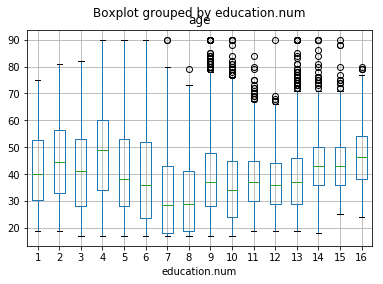

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
adult_data.boxplot(column="age",by="education.num")

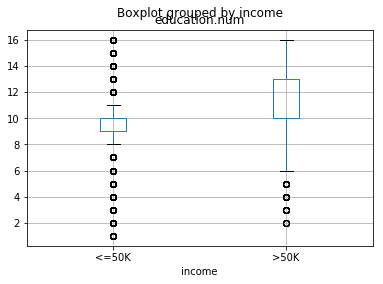

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
adult_data.boxplot(column="education.num",by="income")

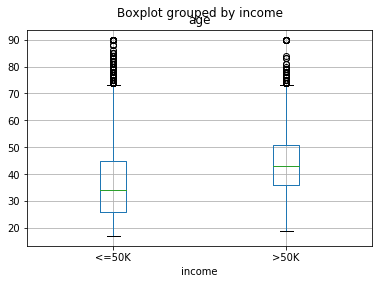

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
adult_data.boxplot(column="age",by="income")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F6FBD30>,
      dtype=object)

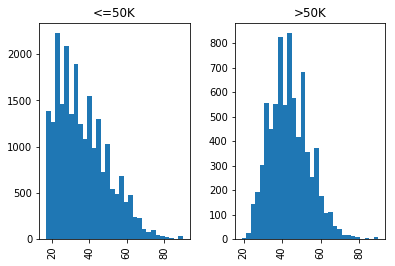

In [139]:
adult_data.hist(column="age",by="income",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001163FEF0>,
      dtype=object)

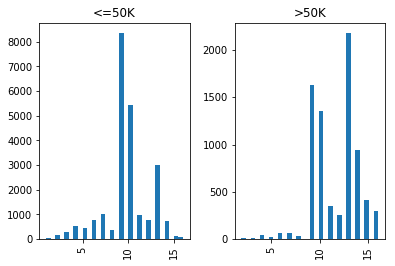

In [140]:
adult_data.hist(column="education.num",by="income",bins=30)

### Cut function for binning 

Sometimes numerical values make more sense if clustered together

In [145]:
adult_data.age.describe()

count    30718.000000
mean        38.443584
std         13.118227
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

### Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 90's

In [146]:
pd.cut(adult_data.age, [20,30,40,50,60,70,80,90])[:30]

1     (80, 90]
3     (50, 60]
4     (40, 50]
5     (30, 40]
6     (30, 40]
7     (70, 80]
8     (60, 70]
9     (40, 50]
10    (40, 50]
11    (30, 40]
12    (50, 60]
13    (30, 40]
15    (40, 50]
16    (40, 50]
17    (50, 60]
18    (20, 30]
19    (30, 40]
20    (30, 40]
21    (20, 30]
22    (60, 70]
23    (50, 60]
25    (20, 30]
26    (30, 40]
27    (40, 50]
28    (30, 40]
29    (30, 40]
30    (20, 30]
31    (50, 60]
32    (50, 60]
33    (50, 60]
Name: age, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

### The parentheses indicate an open interval, meaning that the interval includes values up to but not including the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the right flag to False:

In [147]:
pd.cut(adult_data.age, [20,30,40,50,60,70,80,90], right=False)[:30]

1     [80, 90)
3     [50, 60)
4     [40, 50)
5     [30, 40)
6     [30, 40)
7     [70, 80)
8     [60, 70)
9     [40, 50)
10    [40, 50)
11    [30, 40)
12    [50, 60)
13    [30, 40)
15    [40, 50)
16    [40, 50)
17    [50, 60)
18    [20, 30)
19    [30, 40)
20    [30, 40)
21    [20, 30)
22    [60, 70)
23    [50, 60)
25    [20, 30)
26    [30, 40)
27    [40, 50)
28    [30, 40)
29    [30, 40)
30    [20, 30)
31    [50, 60)
32    [50, 60)
33    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

### Since the data are now ordinal, rather than numeric, we can give them labels:

In [148]:
pd.cut(adult_data.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])[:30]

1         ancient
3     middle-aged
4     middle-aged
5           young
6           young
7             old
8             old
9     middle-aged
10    middle-aged
11          young
12    middle-aged
13          young
15    middle-aged
16    middle-aged
17    middle-aged
18          young
19          young
20          young
21          young
22            old
23    middle-aged
25          young
26          young
27    middle-aged
28          young
29          young
30          young
31    middle-aged
32    middle-aged
33    middle-aged
Name: age, dtype: category
Categories (4, object): [young < middle-aged < old < ancient]

###  
A related function qcut uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [150]:
pd.qcut(adult_data.age, 4)[:30]

1       (47.0, 90.0]
3       (47.0, 90.0]
4       (37.0, 47.0]
5       (28.0, 37.0]
6       (37.0, 47.0]
7       (47.0, 90.0]
8       (47.0, 90.0]
9       (37.0, 47.0]
10      (37.0, 47.0]
11      (37.0, 47.0]
12      (47.0, 90.0]
13      (28.0, 37.0]
15      (37.0, 47.0]
16      (37.0, 47.0]
17      (47.0, 90.0]
18    (16.999, 28.0]
19      (28.0, 37.0]
20      (28.0, 37.0]
21      (28.0, 37.0]
22      (47.0, 90.0]
23      (47.0, 90.0]
25    (16.999, 28.0]
26      (28.0, 37.0]
27      (47.0, 90.0]
28      (28.0, 37.0]
29      (37.0, 47.0]
30    (16.999, 28.0]
31      (47.0, 90.0]
32      (47.0, 90.0]
33      (47.0, 90.0]
Name: age, dtype: category
Categories (4, interval[float64]): [(16.999, 28.0] < (28.0, 37.0] < (37.0, 47.0] < (47.0, 90.0]]

####  Alternatively, one can specify custom quantiles to act as cut points:

#### Coding nominal data

####   Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

####  Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
Some categories might have very low frequencies and its generally a good idea to combine them.

In [19]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
